## This Notebook Solve Simple Regression Task

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv("/content/Airline_Delay_Cause.csv")

In [62]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [63]:
# statistical information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [64]:
# drop categorical variable
data = data.drop(["carrier", "carrier_name", "airport", "airport_name"],axis=1)
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [65]:
# dropna
data.dropna(inplace=True)

In [66]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317268 entries, 0 to 318016
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317268 non-null  int64  
 1   month                317268 non-null  int64  
 2   arr_flights          317268 non-null  float64
 3   arr_del15            317268 non-null  float64
 4   carrier_ct           317268 non-null  float64
 5   weather_ct           317268 non-null  float64
 6   nas_ct               317268 non-null  float64
 7   security_ct          317268 non-null  float64
 8   late_aircraft_ct     317268 non-null  float64
 9   arr_cancelled        317268 non-null  float64
 10  arr_diverted         317268 non-null  float64
 11  arr_delay            317268 non-null  float64
 12  carrier_delay        317268 non-null  float64
 13  weather_delay        317268 non-null  float64
 14  nas_delay            317268 non-null  float64
 15  security_delay       3

In [68]:
x = data.drop("arr_flights", axis=1)
y = data["arr_flights"]

In [69]:
x

,year,month,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [70]:
y

,arr_flights
0,136.0
1,91.0
2,19.0
3,88.0
4,181.0
...,...
318012,480.0
318013,505.0
318014,146.0
318015,95.0


In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [72]:
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (253814, 16)
x_test shape :  (63454, 16)
y_train shape :  (253814,)
y_test shape :  (63454,)


In [73]:
import tensorflow as tf
import keras

In [74]:
KerasModel = keras.models.Sequential([
             keras.layers.Dense(8, activation = "tanh"),
            #  keras.layers.Dropout(0.1),
             keras.layers.Dense(128, activation = "tanh"),
            #  keras.layers.Dropout(0.3),
             keras.layers.Dense(64, activation = "tanh"),
             keras.layers.Dropout(0.2),
             keras.layers.Dense(1, activation = "linear")
             ])

In [75]:
KerasModel.compile(optimizer="adam", loss="mse", metrics = ["mse"])

In [77]:
history = KerasModel.fit(
          x_train, y_train,
          validation_data = (x_test, y_test),
          epochs = 100,
          batch_size = 128, # 1
          verbose = 1,
          callbacks = [tf.keras.callbacks.EarlyStopping(
              patience = 5,
              monitor = "val_loss",
              restore_best_weights = True
          )]
        )

Epoch 1/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 1168343.1250 - mse: 1168343.1250 - val_loss: 1093059.6250 - val_mse: 1093059.6250
Epoch 2/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 1127644.3750 - mse: 1127644.3750 - val_loss: 1036742.3125 - val_mse: 1036742.3125
Epoch 3/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 1060985.7500 - mse: 1060985.7500 - val_loss: 987437.8750 - val_mse: 987437.8750
Epoch 4/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - loss: 1025791.1875 - mse: 1025791.1875 - val_loss: 943410.5000 - val_mse: 943410.5000
Epoch 5/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 942050.0625 - mse: 942050.0625 - val_loss: 903669.6250 - val_mse: 903669.6250
Epoch 6/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 927453.4375 - mse: 927453.4375 - val_loss: 866636.7500 - val_mse: 866636.7500
Epoch 7/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 903863.0000 - mse: 903863.0000 - val_loss: 834697.1875 - val_mse: 834697

In [78]:
print(KerasModel.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,829 (112.62 KB)

 Trainable params: 9,609 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,220 (75.08 KB)

None


In [79]:
KerasModel.save("KerasModel.keras")

In [80]:
UploadedModel = keras.models.load_model("KerasModel.keras")

In [81]:
y_pred = KerasModel.predict(x_test)

1983/1983 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [82]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(x_test, y_test)
print("Model Loss : ", ModelLoss)
print("Model Accuracy : ", ModelAccuracy)

1983/1983 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 326219.4375 - mse: 326219.4375
Model Loss :  350121.375
Model Accuracy :  350121.375


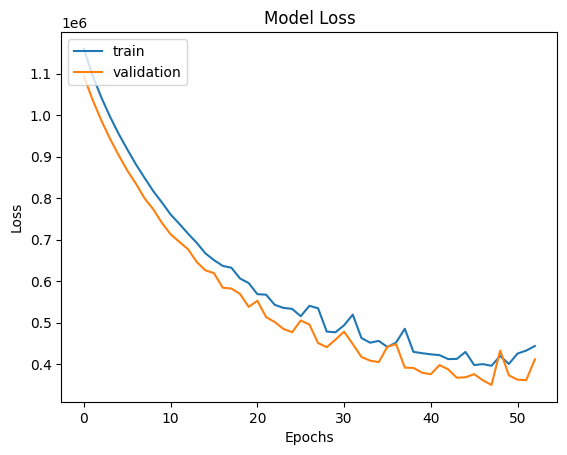

In [83]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [84]:
len(y_pred), len(y_test)

(63454, 63454)

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 350120.9404692262
Mean Absolute Error: 217.31713799350888
R-squared: 0.6602896470137646


## Neural Network is not preferred for Regression Task